# Part I - (Dataset Exploration Title)
## by (EKPOT GODSWILL TOM)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [303]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [314]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [315]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Quality issues
1. Presence of null values
2. The start_time and end_time are both object datatypes and are supposed to be datetime variables


Tidiness issues
1. The start_time and end_time are both object datatypes and are supposed to be datetime variables
2. There are columns for longitude and latitude but no column for distance so we will use the longitude and latitude info to calculate distance. 
3. Also, we will use member birth year and year from the time stamp to calculate age of the rider.
4. Duration in seconds will be changed to minutes and probably hours

In [317]:
dfcop=df.copy()

In [318]:
df=df.dropna(axis=0)

To drop the longitude and latitude columns so they dont clog our data

In [324]:
dcols=df.iloc[:,[5,6,9,10]]
dcols.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,37.789625,-122.400811,37.794231,-122.402923
2,37.769305,-122.426826,37.786375,-122.404904
3,37.774836,-122.446546,37.773311,-122.444293
4,37.804562,-122.271738,37.792714,-122.248780
5,37.770407,-122.391198,37.798014,-122.405950


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [327]:
df=df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)

In [328]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


Info to be gotten from the data
1. get the age range of people who use this service the most.
2. Get the average distance traveled by the riders monthly or yearly
3. get average duration riden by people who share and people who dont share
4. To check if sharing has any influence on duration and distance
5. To find relationship between gender and member type
6. The most used start point to know location with more time


To get columns of the members ages, we'll subtract their birth year from the current year

Converting staart and end time columns to datetime datatype

In [329]:
df[["start_time", "end_time"]] = df[["start_time", "end_time"]].apply(pd.to_datetime)

In [330]:
df['year']=df["start_time"].dt.year

In [331]:
df['year']

0         2019
2         2019
3         2019
4         2019
5         2019
          ... 
183407    2019
183408    2019
183409    2019
183410    2019
183411    2019
Name: year, Length: 174952, dtype: int64

In [332]:
df['Dates'] = pd. to_datetime(df['start_time']). dt. date

seperating time and dates

In [333]:
df['Time'] = pd. to_datetime(df['start_time']). dt. time

In [334]:
df['member_age']=df['year']-df['member_birth_year']

In [335]:
df['member_age'].head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: member_age, dtype: float64

To get distance, we aim to turn the start and end longitudes and latitudes to coordinates then calculate the distance between them using a euclidean distance function

In [336]:
#using haversine library
import haversine as hs

In [339]:
dcols['start_coordinate'] = (dcols['start_station_latitude'].astype(str) + ',' + dcols['start_station_longitude']. \
     astype(str)).str.split(',').apply(lambda coord: [float(c) for c in coord])

dcols['end_coordinate'] = (dcols['end_station_latitude'].astype(str) + ',' + dcols['end_station_longitude']. \
     astype(str)).str.split(',').apply(lambda coord: [float(c) for c in coord])


To test the function

In [341]:
hs.haversine(dcols['start_coordinate'][0],dcols['end_coordinate'][0])

0.544709255692834

In [343]:
dcols['start-end'] = list(zip(dfb.start_coordinate, dfb.end_coordinate))
dcols.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_coordinate,end_coordinate,start-end
0,37.789625,-122.400811,37.794231,-122.402923,"[37.7896254, -122.400811]","[37.794231, -122.402923]","([37.7896254, -122.400811], [37.794231, -122.4..."
2,37.769305,-122.426826,37.786375,-122.404904,"[37.7693053, -122.4268256]","[37.78637526861584, -122.40490436553954]","([37.7693053, -122.4268256], [37.7863752686158..."
3,37.774836,-122.446546,37.773311,-122.444293,"[37.77483629413345, -122.44654566049576]","[37.77331087889723, -122.44429260492323]","([37.77483629413345, -122.44654566049576], [37..."
4,37.804562,-122.271738,37.792714,-122.248780,"[37.8045623549303, -122.27173805236816]","[37.7927143, -122.2487796]","([37.8045623549303, -122.27173805236816], [37...."
5,37.770407,-122.391198,37.798014,-122.405950,"[37.7704074, -122.3911984]","[37.79801364395978, -122.40595042705534]","([37.7704074, -122.3911984], [37.7980136439597..."


In [355]:
dcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_latitude   174952 non-null  float64
 1   start_station_longitude  174952 non-null  float64
 2   end_station_latitude     174952 non-null  float64
 3   end_station_longitude    174952 non-null  float64
 4   start_coordinate         174952 non-null  object 
 5   end_coordinate           174952 non-null  object 
 6   start-end                174952 non-null  object 
dtypes: float64(4), object(3)
memory usage: 14.7+ MB


In [356]:
dcols['start_coordinate'].values

array([list([37.7896254, -122.400811]), list([37.7693053, -122.4268256]),
       list([37.77483629413345, -122.44654566049576]), ...,
       list([37.3319323, -121.9048882]), list([37.8113514, -122.2734217]),
       list([37.7896767, -122.3904285])], dtype=object)

In [354]:
dfb['dist']=[]
for i1,i2 in zip(dcols['start_coordinate'].values, dcols['end_coordinate'].values):
    print(i1)
    break
    i=0
    try:
        print()
        hs.haversine(i1, i2)
        i+=1
    except Exception as e:
        print(e)

ValueError: Length of values (0) does not match length of index (174952)

In [353]:
dfb['dist']=[]
for i1,i2 in zip(dcols.start_coordinate,dcols.end_coordinate):
    print(i1)
    break
    i=0
    try:
        print()
        hs.haversine(i1,i2)
        i+=1
    except Exception as e:
        print(e)

ValueError: Length of values (0) does not match length of index (174952)

In [134]:
first_point=dfc['start_coordinate']
second_point=dfc['end_coordinate']

In [136]:
'''
for sp in first_point:
    for ep in second_point:
    dist=hs.haversine(sp,ep)
'''
#This is a code to find the distance between the 2 points, however, i do not have the memory it requires to calculate and 
#store the results

'\nfor sp in first_point:\n    for ep in second_point:\n    dist=hs.haversine(sp,ep)\n'

dfc['distance'] = (first_point.astype(str) + ',' + second_point. \
     astype(str)).str.split(',').apply(lambda coord: [hs.haversine(c,s) for c,s in coord])


for slat_p in df['start_station_latitude']:
    for slong_p in df['start_station_longitude']:
        km=harvesine(lat_p, long_p)
        distance. append(km)
        

In [346]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019,2019-02-28,17:32:10.145000,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019,2019-02-28,12:13:13.218000,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019,2019-02-28,17:54:26.010000,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019,2019-02-28,23:54:18.549000,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019,2019-02-28,23:49:58.632000,60.0


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  year            

To calculate time in minutes

In [348]:
df['duration_mins']=df.iloc[:,0]/60
df.head()
df=df.drop('duration_sec',axis=1)

In [349]:
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019,2019-02-28,17:32:10.145000,35.0,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019,2019-02-28,12:13:13.218000,47.0,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019,2019-02-28,17:54:26.010000,30.0,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019,2019-02-28,23:54:18.549000,45.0,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019,2019-02-28,23:49:58.632000,60.0,29.883333


In [197]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'year', 'Dates', 'Time', 'member_age',
       'duration_mins', 'months'],
      dtype='object')

In [198]:
cols=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

In [199]:
dfb=df.drop(cols,axis=1)

In [201]:
dfb.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age,duration_mins,months
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019,2019-02-28,17:32:10.145000,35.0,869.750000,"[2019, 02, 28]"
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019,2019-02-28,12:13:13.218000,47.0,1030.900000,"[2019, 02, 28]"
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019,2019-02-28,17:54:26.010000,30.0,608.166667,"[2019, 02, 28]"
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019,2019-02-28,23:54:18.549000,45.0,26.416667,"[2019, 02, 28]"
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019,2019-02-28,23:49:58.632000,60.0,29.883333,"[2019, 02, 28]"


In [203]:
dfb.drop(['year','months'],axis=1,inplace=True)

In [204]:
dfb.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Dates,Time,member_age,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,35.0,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,47.0,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,30.0,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,45.0,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.632000,60.0,29.883333


In [211]:
df['datehour'] = df['start_time'].dt.hour

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


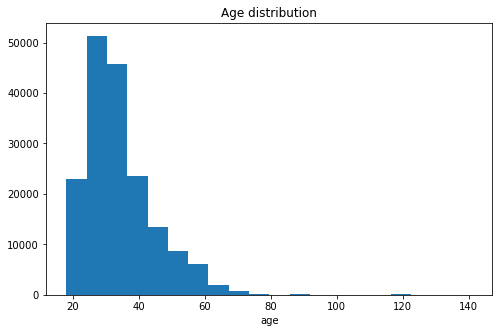

In [161]:
#ax=plt.axes
#sns.scatterplot('member_age',data=dfc)
binsize = 500
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_age', bins =20)
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

we can observe from the histogram that prople within the ages of 20 and 40 ride bikes the most.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender count')

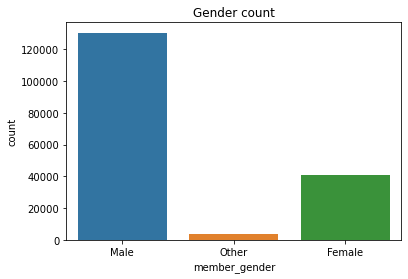

In [163]:
sns.countplot('member_gender',data=df).set_title('Gender count')

It is obvious from the visualizations that we have a more significant amount of male members than female members

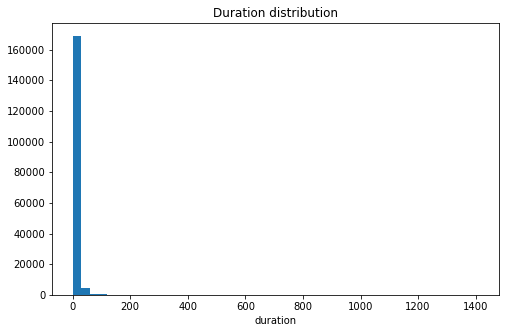

In [164]:
binsize = 30
bins = np.arange(0, df['duration_mins'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_mins', bins =bins)
plt.xlabel('duration')
plt.title('Duration distribution')
plt.show()

from this we can conclude that mst bike rides take 30 minutes- 1 hour

Text(0.5, 1.0, 'bike_share_count')

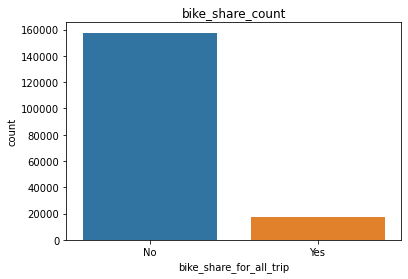

In [166]:
ax=plt.axes()
sns.countplot(x='bike_share_for_all_trip',data=df).set_title('bike_share_count')

We have a low bike share rate and we will explore that in bivariate stage



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datehour', ylabel='count'>

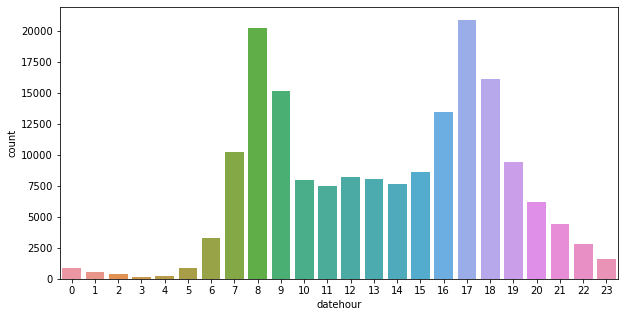

In [276]:
plt.figure(figsize = [10, 5])
sns.countplot('datehour',data=df)

from this time count plot, we can say most people ridw between 7am & 10am and between 4pm and 7pm using the 24hr formmat

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Had to calculate some new values to get a clearer picture like member age, duration mins, dates etc
Time variable is stored as an object and need to be change to datatieme
The year column is not necessary since all the rides are form a single year

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [298]:
numeric=['member_age','duration_mins','member_birth_year','datehour']

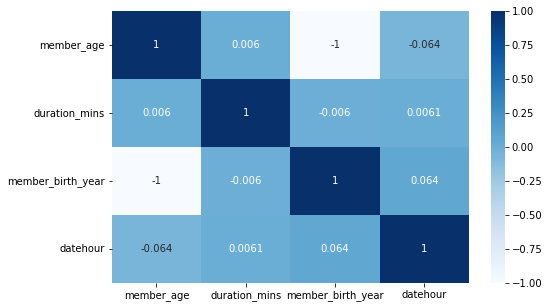

In [302]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric].corr(), annot = True,
           cmap = 'Blues', center = 0)
plt.show()

In [173]:
df['Dates']=df["Dates"].astype(str)

In [178]:
df['months']=df['Dates'].str.split("-")

Text(0.5, 1.0, 'gender ride duration')

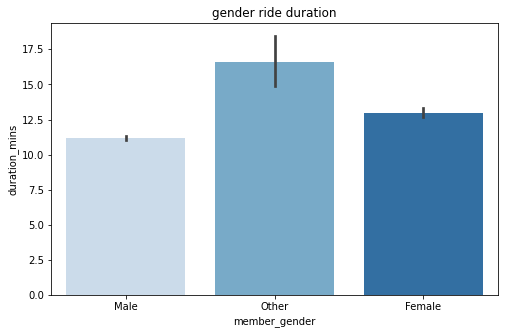

In [227]:
plt.figure(figsize = [8, 5])
sns.barplot(x='member_gender',y='duration_mins',data=df,palette='Blues').set_title('gender ride duration')

we can say from this that the men ride bikes for the least time even tho they have the highest population of bike riders

Text(0.5, 1.0, 'gender ride duration')

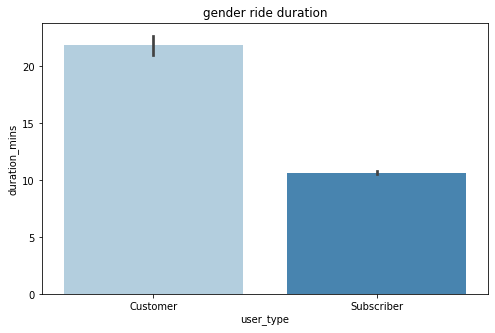

In [230]:
plt.figure(figsize = [8, 5])
sns.barplot(x='user_type',y='duration_mins',data=df,palette='Blues').set_title('gender ride duration')

Text(0.5, 1.0, 'gender ride duration')

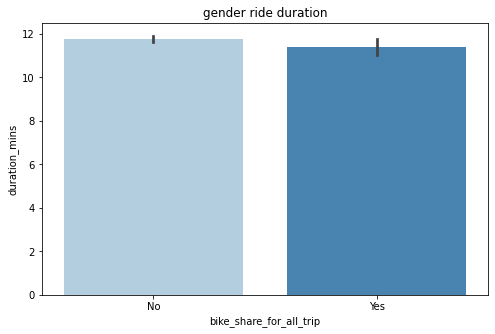

In [232]:
plt.figure(figsize = [8, 5])
sns.barplot(x='bike_share_for_all_trip',y='duration_mins',data=df,palette='Blues').set_title('gender ride duration')

In [265]:
df['id']=np.random.randint(1,len(df))

<AxesSubplot:xlabel='member_age', ylabel='datehour'>

<Figure size 720x360 with 0 Axes>

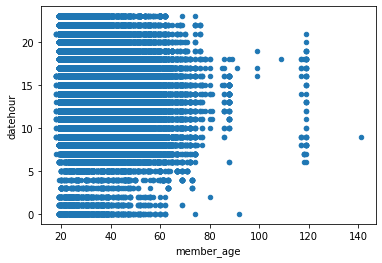

In [296]:
plt.figure(figsize = [10, 5])
df.plot.scatter(y='datehour',x='member_age')

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

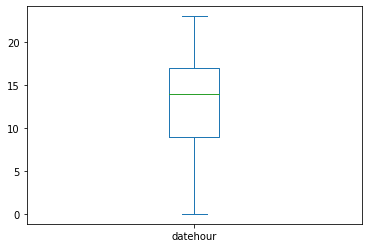

In [297]:
plt.figure(figsize = [10, 5])
df.plot.box(y='datehour',x='member_age')

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  float64       
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  object        
 12  member_birth_yea

dfc.shape= (174952, 22)
dfc_samp.shape= (500, 22)


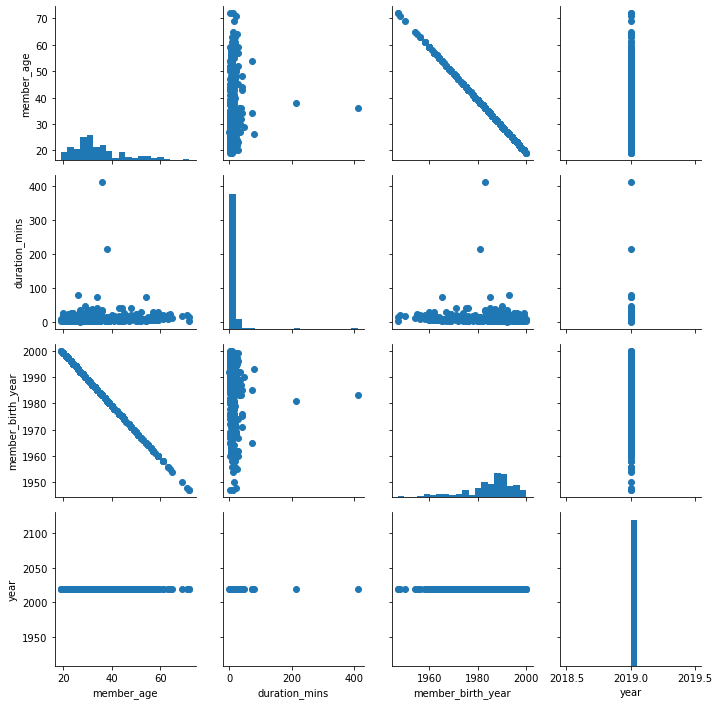

In [240]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("dfc.shape=",dfc.shape)
dfc_samp = dfc.sample(n=500, replace = False)
print("dfc_samp.shape=",dfc_samp.shape)

g = sns.PairGrid(data = dfc_samp, vars = numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [241]:
dfc['year'].value_counts()

2019    174952
Name: year, dtype: int64

In [180]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'year', 'Dates', 'Time', 'member_age',
       'duration_mins', 'months'],
      dtype='object')

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'start_station_latitude', y = 'start_station_longitude', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Carat')
#plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

